#Reasoning under Uncertainty

# Random Variables and Probability Distributions

Random variables represent uncertain quantities, and probability distributions describe the likelihood of different outcomes. Understanding them is crucial for modeling uncertain systems.



In [ ]:
import numpy as np

# Define a discrete random variable X with its probability distribution
X_values = [1, 2, 3, 4, 5]
X_probabilities = [0.1, 0.2, 0.3, 0.2, 0.2]

# Generate a random sample from X
X_sample = np.random.choice(X_values, p=X_probabilities)
print("Random sample from X:", X_sample)

Random sample from X: 3


#Normal Distribution:


The Normal distribution, also known as the Gaussian distribution, is a continuous probability distribution characterized by its bell-shaped curve. It is widely used in statistics and probability theory due to its mathematical tractability and its prevalence in natural phenomena.


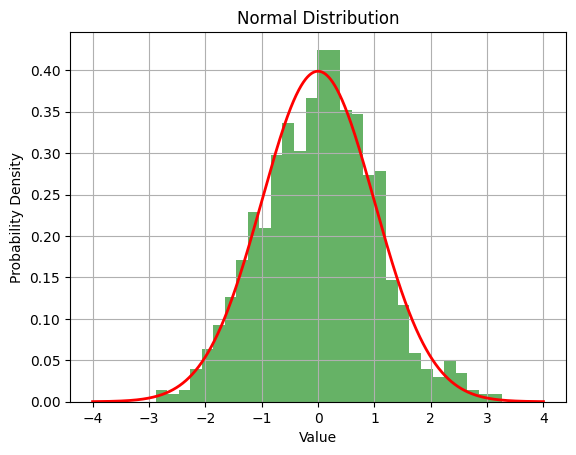

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Define parameters for the normal distribution
mu = 0  # Mean
sigma = 1  # Standard deviation

# Generate random samples from the normal distribution
samples = np.random.normal(mu, sigma, 1000)

# Plot the histogram of the samples
plt.hist(samples, bins=30, density=True, alpha=0.6, color='g')

# Plot the probability density function (PDF) of the normal distribution
x = np.linspace(-4, 4, 1000)
plt.plot(x, norm.pdf(x, mu, sigma), 'r-', lw=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Normal Distribution')
plt.grid(True)
plt.show()

#Min-Max Scaling:


Min-Max scaling, also known as Min-Max normalization, is a data preprocessing technique used to rescale numerical features to a fixed range, typically between 0 and 1. It transforms the original data by subtracting the minimum value and then dividing by the range of the data.

In [ ]:
import numpy as np

# Define some sample data
data = np.array([1, 5, 10, 20, 50])

# Perform Min-Max scaling
min_val = np.min(data)
max_val = np.max(data)
scaled_data = (data - min_val) / (max_val - min_val)

print("Original data:", data)
print("Scaled data (MinMax scaled):", scaled_data)

Original data: [ 1  5 10 20 50]
Scaled data (MinMax scaled): [0.         0.08163265 0.18367347 0.3877551  1.        ]


#Standard Normal Distribution:


The Standard Normal distribution is a special case of the Normal distribution where the mean is 0 and the standard deviation is 1. It serves as a standard reference distribution in statistics, often used for hypothesis testing and constructing confidence intervals.



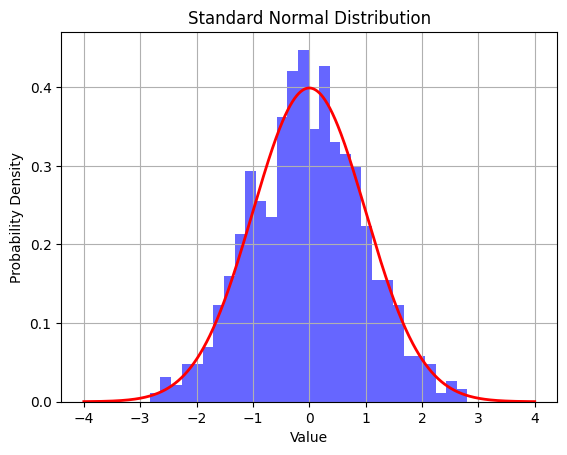

In [ ]:
# Generate random samples from the standard normal distribution
standard_samples = np.random.standard_normal(1000)

# Plot the histogram of the standard samples
plt.hist(standard_samples, bins=30, density=True, alpha=0.6, color='b')

# Plot the probability density function (PDF) of the standard normal distribution
plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title('Standard Normal Distribution')
plt.grid(True)
plt.show()

#Conditional Independence

Conditional independence describes the relationship between variables such that knowing the value of one variable does not provide any additional information about another variable given the value of a third variable.

In [ ]:
import pandas as pd

# Check if variables A and B are conditionally independent given variable C
def conditional_independence(A, B, C, data):
    # Calculate P(A, B | C)
    P_A_B_given_C = (data[(data[A] == 1) & (data[B] == 1) & (data[C] == 1)].shape[0]) / \
                    (data[data[C] == 1].shape[0])
    # Calculate P(A | C) * P(B | C)
    P_A_given_C = (data[data[C] == 1][A].sum()) / (data[data[C] == 1].shape[0])
    P_B_given_C = (data[data[C] == 1][B].sum()) / (data[data[C] == 1].shape[0])
    P_A_B_given_C_expected = P_A_given_C * P_B_given_C

    # Check if P(A, B | C) equals P(A | C) * P(B | C)
    return abs(P_A_B_given_C - P_A_B_given_C_expected) < 0.01

# Example usage
data = pd.DataFrame({'A': [1, 0, 1, 0, 1], 'B': [1, 1, 0, 0, 1], 'C': [1, 0, 1, 1, 0]})
print("Are A and B conditionally independent given C?", conditional_independence('A', 'B', 'C', data))

Are A and B conditionally independent given C? False


#Bayes' Theorem

Bayes' theorem describes the probability of an event based on prior knowledge of conditions that might be related to the event. It's fundamental for updating beliefs in light of new evidence.

In [ ]:
# Calculate posterior probability using Bayes' theorem
def bayes_theorem(prior, likelihood, evidence):
    return (likelihood * prior) / evidence

# Example usage
prior = 0.3  # Prior probability
likelihood = 0.8  # Likelihood of evidence given the hypothesis
evidence = 0.5  # Probability of observing the evidence
posterior = bayes_theorem(prior, likelihood, evidence)
print("Posterior probability:", posterior)


Posterior probability: 0.48


Posterior probability of hypothesis H given evidence E: 0.48


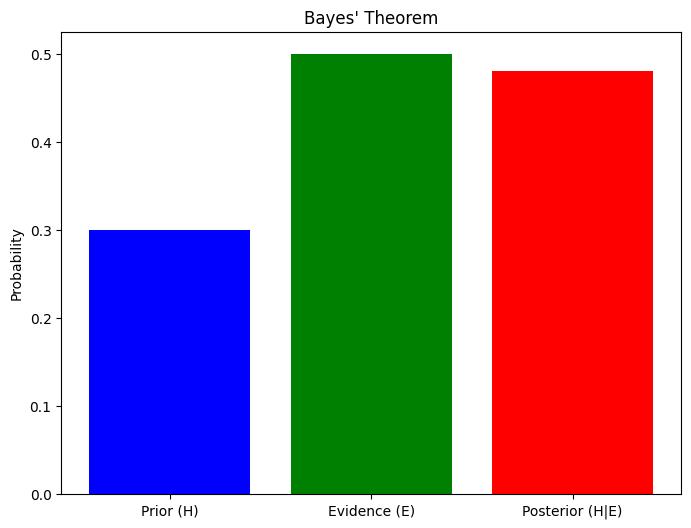

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define prior probability of hypothesis H
prior_H = 0.3

# Define likelihood of evidence E given hypothesis H
likelihood_E_given_H = 0.8

# Define probability of evidence E
evidence_E = 0.5

# Calculate posterior probability of hypothesis H given evidence E using Bayes' theorem
posterior_H_given_E = (likelihood_E_given_H * prior_H) / evidence_E

# Print the posterior probability
print("Posterior probability of hypothesis H given evidence E:", posterior_H_given_E)

# Plotting
labels = ['Prior (H)', 'Evidence (E)', 'Posterior (H|E)']
values = [prior_H, evidence_E, posterior_H_given_E]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red'])
plt.title("Bayes' Theorem")
plt.ylabel("Probability")
plt.show()

#Probabilistic Graphical Models

Probabilistic graphical models provide a framework for representing complex probability distributions using graphs, where nodes represent random variables and edges represent probabilistic dependencies.



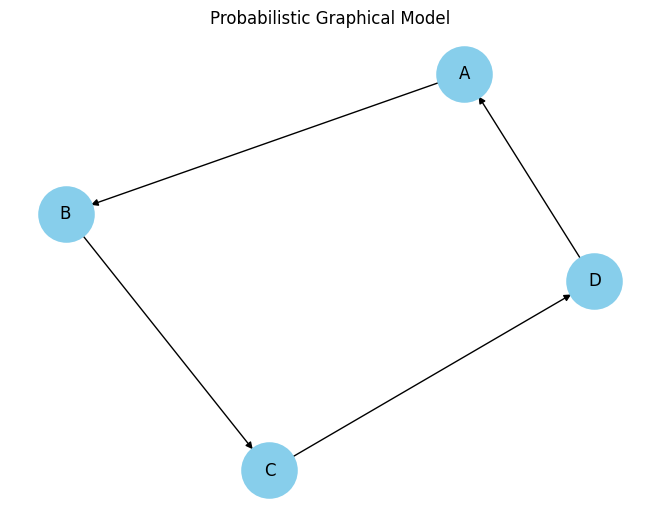

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a probabilistic graphical model
G = nx.DiGraph()
G.add_edges_from([('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'A')])

# Visualize the model
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Probabilistic Graphical Model")
plt.show()

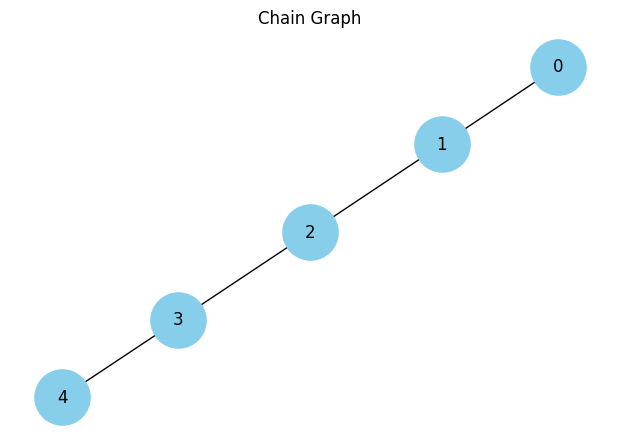

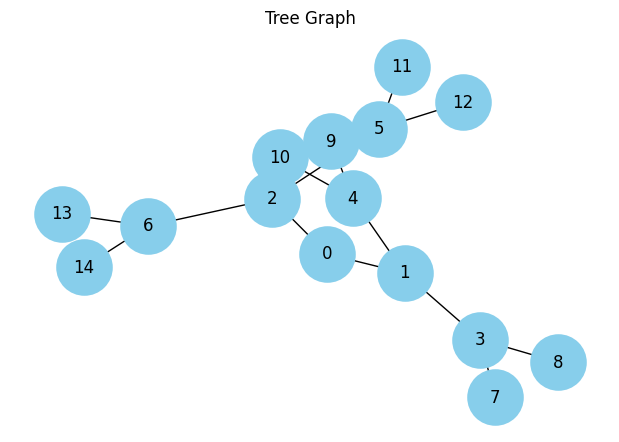

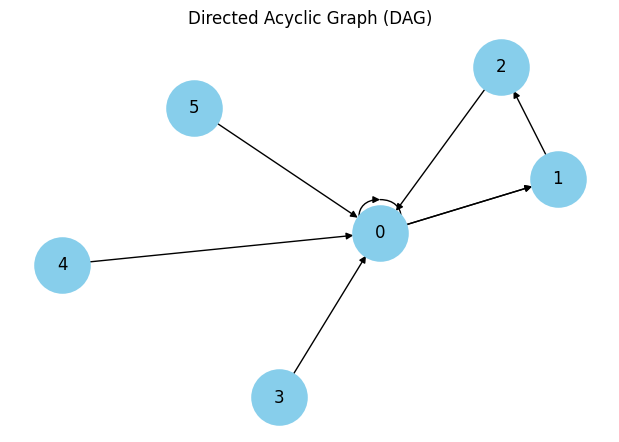

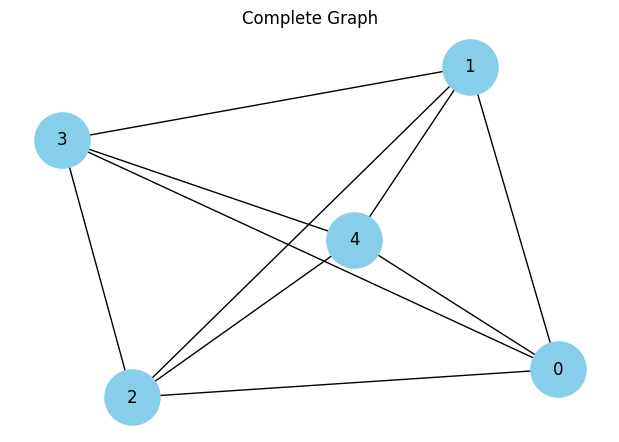

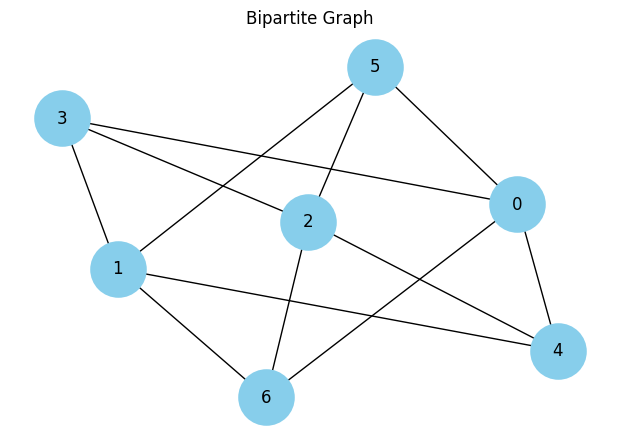

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Chain Graph
G1 = nx.path_graph(5)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G1)
nx.draw(G1, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Chain Graph")
plt.show()

# 2. Tree Graph
G2 = nx.balanced_tree(2, 3)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G2)
nx.draw(G2, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Tree Graph")
plt.show()

# 3. Directed Acyclic Graph (DAG)
G3 = nx.scale_free_graph(6, seed=42)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G3)
nx.draw(G3, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Directed Acyclic Graph (DAG)")
plt.show()

# 4. Complete Graph
G4 = nx.complete_graph(5)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G4)
nx.draw(G4, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Complete Graph")
plt.show()

# 5. Bipartite Graph
G5 = nx.complete_bipartite_graph(3, 4)
plt.figure(figsize=(6, 4))
pos = nx.spring_layout(G5)
nx.draw(G5, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
plt.title("Bipartite Graph")
plt.show()

#Bayesian Networks

Bayesian networks are a type of probabilistic graphical model that represents a joint probability distribution over a set of random variables using a directed acyclic graph, where each node represents a variable and edges represent probabilistic dependencies.

In [ ]:
%pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [ ]:
import numpy as np
import pgmpy.models as pgm
import pgmpy.factors.discrete as pgmf

# Define the structure of the Bayesian Network
model = pgm.BayesianNetwork([('A', 'B'), ('B', 'C')])

# Define the conditional probability distributions (CPDs)
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_B_given_A = pgmf.TabularCPD(variable='B', variable_card=2,
                                values=[[0.2, 0.3], [0.8, 0.7]],
                                evidence=['A'], evidence_card=[2])
cpd_C_given_B = pgmf.TabularCPD(variable='C', variable_card=2,
                                values=[[0.1, 0.2], [0.9, 0.8]],
                                evidence=['B'], evidence_card=[2])

# Add probability distributions to the model
model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_B)

# Check if the model is consistent
print("Is the model consistent?", model.check_model())

Is the model consistent? True


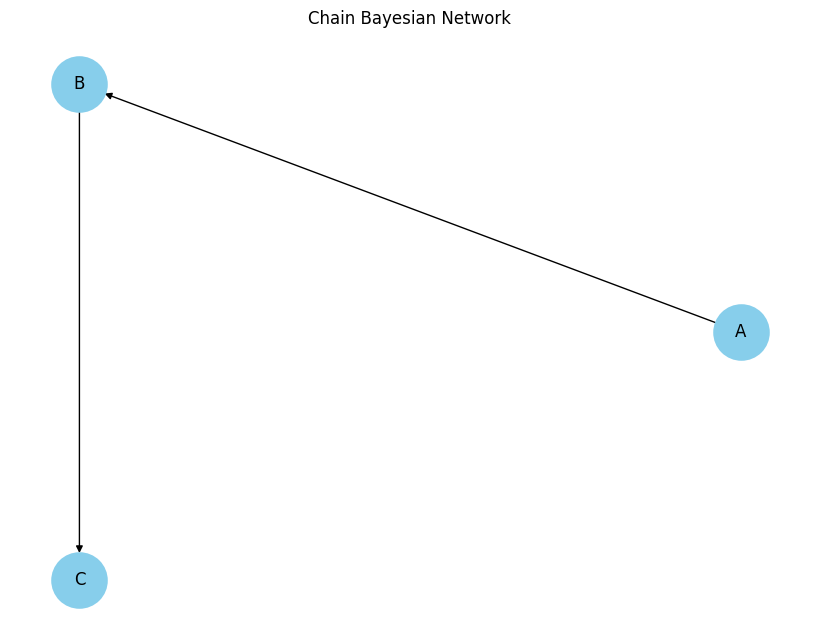

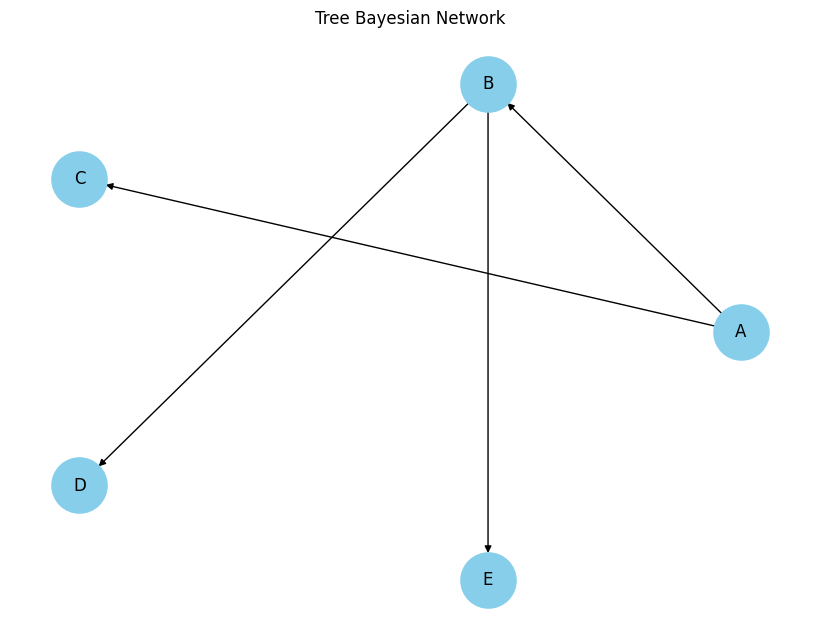

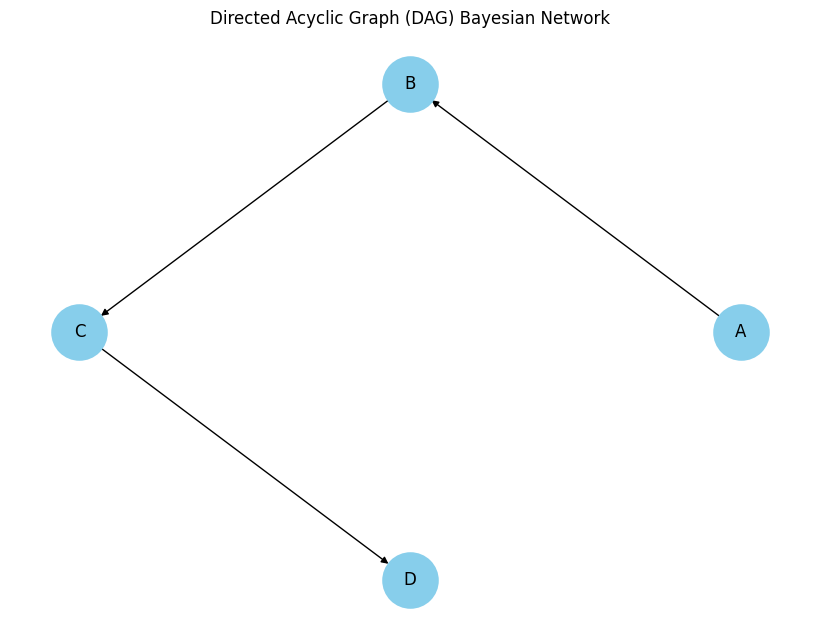

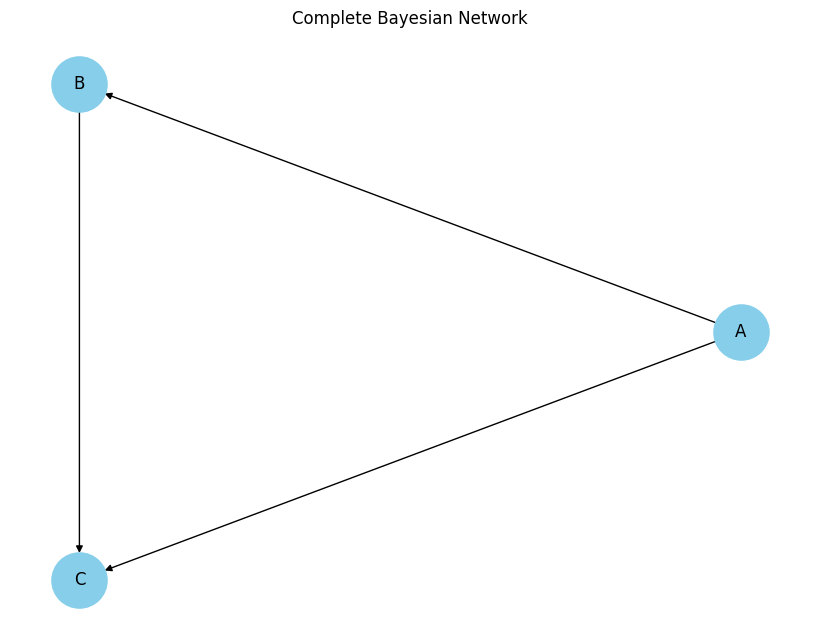

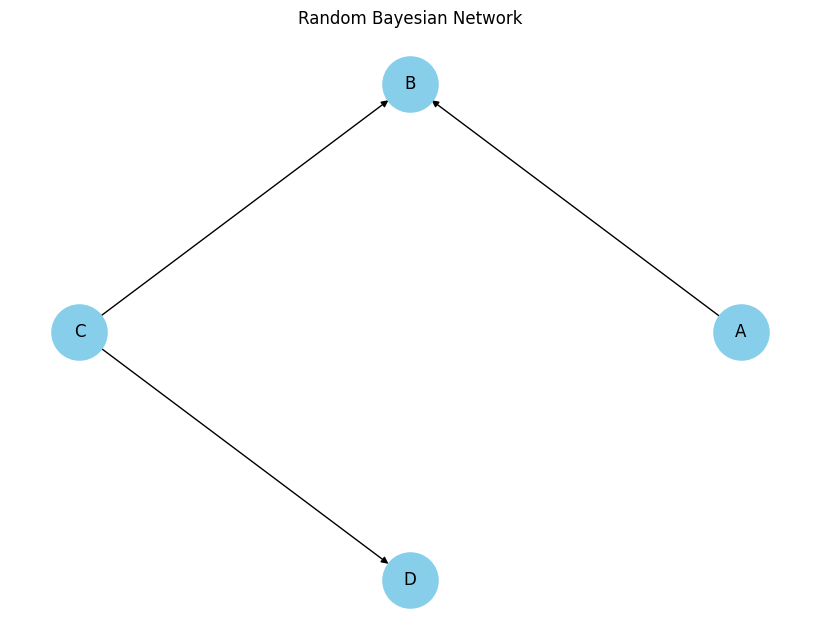

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pgmpy.models as pgm
import pgmpy.factors.discrete as pgmf

# 1. Chain Bayesian Network
chain_model = pgm.BayesianNetwork([('A', 'B'), ('B', 'C')])

# Define CPDs for the Chain Bayesian Network
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_B_given_A = pgmf.TabularCPD(variable='B', variable_card=2,
                                values=[[0.2, 0.3], [0.8, 0.7]],
                                evidence=['A'], evidence_card=[2])
cpd_C_given_B = pgmf.TabularCPD(variable='C', variable_card=2,
                                values=[[0.1, 0.2], [0.9, 0.8]],
                                evidence=['B'], evidence_card=[2])

# Add CPDs to the model
chain_model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_B)

# 2. Tree Bayesian Network
tree_model = pgm.BayesianNetwork([('A', 'B'), ('A', 'C'), ('B', 'D'), ('B', 'E')])

# Define CPDs for the Tree Bayesian Network
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_B_given_A = pgmf.TabularCPD(variable='B', variable_card=2,
                                values=[[0.2, 0.7], [0.8, 0.3]],
                                evidence=['A'], evidence_card=[2])
cpd_C_given_A = pgmf.TabularCPD(variable='C', variable_card=2,
                                values=[[0.5, 0.1], [0.5, 0.9]],
                                evidence=['A'], evidence_card=[2])
cpd_D_given_B = pgmf.TabularCPD(variable='D', variable_card=2,
                                values=[[0.6, 0.3], [0.4, 0.7]],
                                evidence=['B'], evidence_card=[2])
cpd_E_given_B = pgmf.TabularCPD(variable='E', variable_card=2,
                                values=[[0.7, 0.2], [0.3, 0.8]],
                                evidence=['B'], evidence_card=[2])

# Add CPDs to the model
tree_model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_A, cpd_D_given_B, cpd_E_given_B)

# 3. Directed Acyclic Graph (DAG) Bayesian Network
dag_model = pgm.BayesianNetwork([('A', 'B'), ('B', 'C'), ('C', 'D')])

# Define CPDs for the DAG Bayesian Network
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_B_given_A = pgmf.TabularCPD(variable='B', variable_card=2,
                                values=[[0.2, 0.7], [0.8, 0.3]],
                                evidence=['A'], evidence_card=[2])
cpd_C_given_B = pgmf.TabularCPD(variable='C', variable_card=2,
                                values=[[0.5, 0.1], [0.5, 0.9]],
                                evidence=['B'], evidence_card=[2])
cpd_D_given_C = pgmf.TabularCPD(variable='D', variable_card=2,
                                values=[[0.6, 0.3], [0.4, 0.7]],
                                evidence=['C'], evidence_card=[2])

# Add CPDs to the model
dag_model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_B, cpd_D_given_C)

# 4. Complete Bayesian Network
complete_model = pgm.BayesianNetwork([('A', 'B'), ('A', 'C'), ('B', 'C')])

# Define CPDs for the Complete Bayesian Network
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_B_given_A = pgmf.TabularCPD(variable='B', variable_card=2,
                                values=[[0.2, 0.7], [0.8, 0.3]],
                                evidence=['A'], evidence_card=[2])
cpd_C_given_A_B = pgmf.TabularCPD(variable='C', variable_card=2,
                                  values=[[0.5, 0.1, 0.7, 0.2], [0.5, 0.9, 0.3, 0.8]],
                                  evidence=['A', 'B'], evidence_card=[2, 2])

# Add CPDs to the model
complete_model.add_cpds(cpd_A, cpd_B_given_A, cpd_C_given_A_B)

# 5. Random Bayesian Network
random_model = pgm.BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D')])

# Define CPDs for the Random Bayesian Network
cpd_A = pgmf.TabularCPD(variable='A', variable_card=2, values=[[0.6], [0.4]])
cpd_C = pgmf.TabularCPD(variable='C', variable_card=2, values=[[0.7], [0.3]])
cpd_B_given_A_C = pgmf.TabularCPD(variable='B', variable_card=2,
                                  values=[[0.2, 0.8, 0.7, 0.3], [0.8, 0.2, 0.3, 0.7]],
                                  evidence=['A', 'C'], evidence_card=[2, 2])
cpd_D_given_C = pgmf.TabularCPD(variable='D', variable_card=2,
                                values=[[0.5, 0.2], [0.5, 0.8]],
                                evidence=['C'], evidence_card=[2])

# Add CPDs to the model
random_model.add_cpds(cpd_A, cpd_C, cpd_B_given_A_C, cpd_D_given_C)

# Plotting
def plot_bayesian_network(model, title):
    plt.figure(figsize=(8, 6))
    pos = nx.circular_layout(model)  # Use circular layout instead of spring layout
    nx.draw(model, pos, with_labels=True, node_color='skyblue', node_size=1500, edge_color='k', linewidths=2)
    plt.title(title)
    plt.show()

# Plot each Bayesian network
plot_bayesian_network(chain_model, "Chain Bayesian Network")
plot_bayesian_network(tree_model, "Tree Bayesian Network")
plot_bayesian_network(dag_model, "Directed Acyclic Graph (DAG) Bayesian Network")
plot_bayesian_network(complete_model, "Complete Bayesian Network")
plot_bayesian_network(random_model, "Random Bayesian Network")

#Parameter Estimation

Parameter estimation involves determining the parameters of a probability distribution that best fit the observed data. It's essential for learning the underlying structure of probabilistic models.

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the structure of the Bayesian network
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D')])

# Generate random data
num_samples = 1000
data = pd.DataFrame(np.random.randint(2, size=(num_samples, 4)), columns=['A', 'B', 'C', 'D'])

# Estimate parameters using Maximum Likelihood Estimation
estimator = MaximumLikelihoodEstimator(model, data)
estimated_parameters = estimator.get_parameters()

# Convert TabularCPD objects to string representation
estimated_parameters_str = [repr(param) for param in estimated_parameters]

# Output the estimated parameters
print("Estimated parameters:", estimated_parameters_str)

Estimated parameters: ['<TabularCPD representing P(A:2) at 0x79e119768d90>', '<TabularCPD representing P(B:2 | A:2, C:2) at 0x79e119768bb0>', '<TabularCPD representing P(C:2) at 0x79e11976bac0>', '<TabularCPD representing P(D:2 | C:2) at 0x79e11976b6d0>']


#Inference

Inference involves reasoning about the probability distribution of unobserved variables given observed evidence. It's used to make predictions or draw conclusions from probabilistic models.

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from pgmpy.factors.discrete import TabularCPD

# Define the structure of the Bayesian network
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D')])

# Generate random data
num_samples = 1000
data = pd.DataFrame(np.random.randint(2, size=(num_samples, 4)), columns=['A', 'B', 'C', 'D'])

# Define CPDs for the missing nodes
cpd_A = TabularCPD(variable='A', variable_card=2, values=[[0.5], [0.5]])

# Add CPDs to the model
model.add_cpds(cpd_A)

# Estimate CPDs from data using Maximum Likelihood Estimator for other nodes
estimator = MaximumLikelihoodEstimator(model, data)
estimated_parameters = estimator.get_parameters()

# Add estimated CPDs to the model
for cpd in estimated_parameters:
    model.add_cpds(cpd)

# Perform inference using Variable Elimination
inference = VariableElimination(model)
query = inference.query(variables=['C'], evidence={'A': 0})
print("Probability distribution of C given evidence A=0:", query)

Probability distribution of C given evidence A=0: +------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.4960 |
+------+----------+
| C(1) |   0.5040 |
+------+----------+


#Probabilistic Graphical Model Structure Learning

In [ ]:
import numpy as np
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.factors.discrete import TabularCPD

# Generate random data
num_samples = 1000
data = pd.DataFrame(np.random.randint(2, size=(num_samples, 4)), columns=['A', 'B', 'C', 'D'])

# Perform structure learning using Hill Climbing algorithm
estimator = HillClimbSearch(data)
best_model = estimator.estimate()
print("Best model structure:", best_model.edges())

# Define the structure of the Bayesian network manually based on the data
model = BayesianNetwork([('A', 'B'), ('A', 'C'), ('C', 'D'), ('B', 'D')])

# Estimate CPDs from data using Maximum Likelihood Estimator
estimator = MaximumLikelihoodEstimator(model, data)
estimated_parameters = estimator.get_parameters()

# Add estimated CPDs to the model
for cpd in estimated_parameters:
    model.add_cpds(cpd)

# Perform inference using Variable Elimination
from pgmpy.inference import VariableElimination

inference = VariableElimination(model)
query = inference.query(variables=['C'], evidence={'A': 0})
print("Probability distribution of C given evidence A=0:", query)

  0%|          | 0/1000000 [00:00<?, ?it/s]

Best model structure: []
Probability distribution of C given evidence A=0: +------+----------+
| C    |   phi(C) |
+======+==========+
| C(0) |   0.5050 |
+------+----------+
| C(1) |   0.4950 |
+------+----------+
